In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/4174747132.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_u = np.math.comb(m, i)
/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/4174747132.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_v = np.math.comb(n, j)


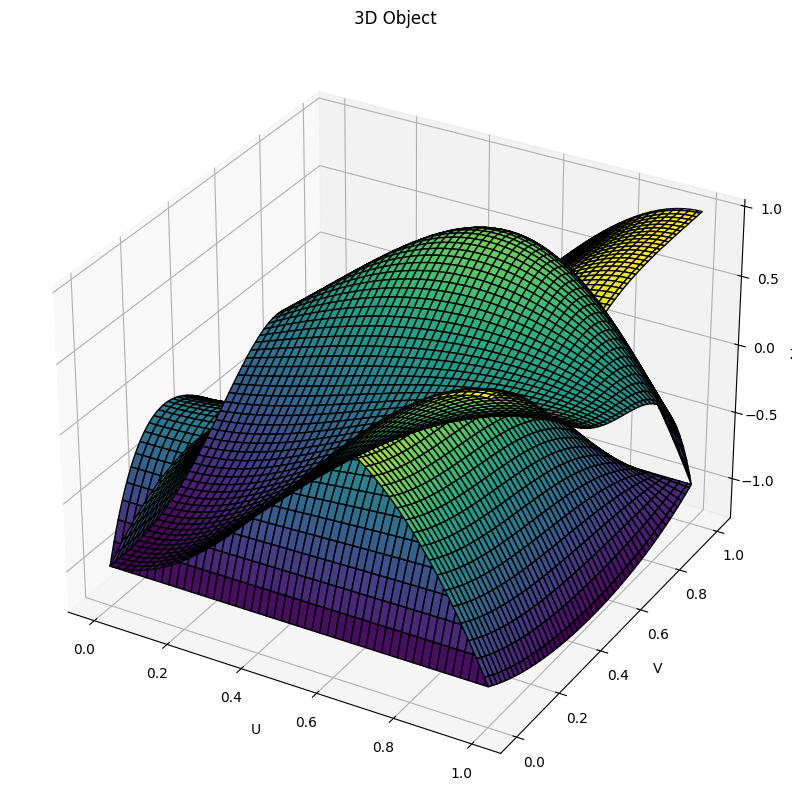

In [13]:
def bezier_surface(control_points, u, v):
    m, n = control_points.shape[0] - 1, control_points.shape[1] - 1
    result = np.zeros_like(control_points[0, 0])

    for i in range(m + 1):
        for j in range(n + 1):
            binomial_coeff_u = np.math.comb(m, i)
            binomial_coeff_v = np.math.comb(n, j)
            coeff = binomial_coeff_u * binomial_coeff_v * (1 - u)**(m - i) * u**i * (1 - v)**(n - j) * v**j
            result += coeff * control_points[i, j]

    return result

def generate_cube_object(wave_frequency, wave_amplitude):
    control_points = np.array([
        [[-1.0, -1.0, -1.0], [-1.0, -1.0, 1.0], [-1.0, 1.0, 1.0], [-1.0, 1.0, -1.0]],
        [[1.0, -1.0, -1.0], [1.0, -1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, -1.0]],
        [[-1.0, -1.0, -1.0], [-1.0, -1.0, 1.0], [1.0, -1.0, 1.0], [1.0, -1.0, -1.0]],
        [[-1.0, 1.0, -1.0], [-1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, -1.0]],
        [[-1.0, -1.0, -1.0], [-1.0, 1.0, -1.0], [1.0, 1.0, -1.0], [1.0, -1.0, -1.0]]
    ])

    for i in range(1, 4):
        for j in range(1, 4):
            control_points[i, j][2] += wave_amplitude * np.sin(wave_frequency * control_points[i, j][0])

    return control_points

def plot_object(object_points):
    u_values = np.linspace(0, 1, 100)
    v_values = np.linspace(0, 1, 100)
    points = np.zeros((len(u_values), len(v_values), 3))
    for i, u in enumerate(u_values):
        for j, v in enumerate(v_values):
            point = bezier_surface(object_points, u, v)
            points[i, j] = point

    u_mesh, v_mesh = np.meshgrid(u_values, v_values)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 0], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 1], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 2], cmap='viridis', edgecolor='k')
    ax.set_xlabel('U')
    ax.set_ylabel('V')
    ax.set_zlabel('Z')
    ax.set_title('3D Object')
    plt.show()

# Example usage
wave_frequency = 5.0
wave_amplitude = 0.3

object_points = generate_cube_object(wave_frequency, wave_amplitude)
plot_object(object_points)


/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/257977637.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_u = np.math.comb(m, i)
/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/257977637.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_v = np.math.comb(n, j)


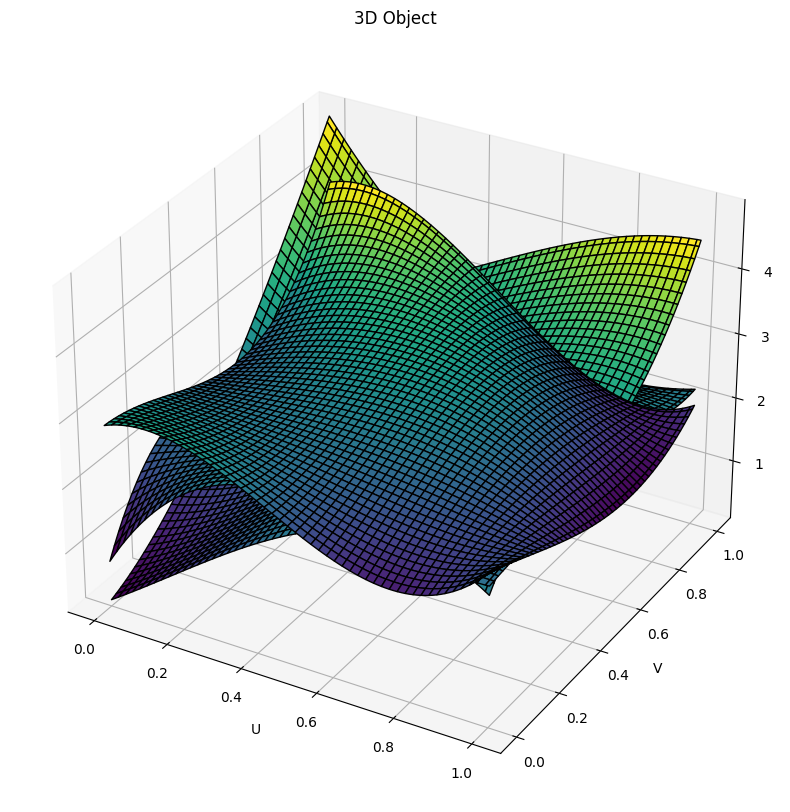

In [14]:
def bezier_surface(control_points, u, v):
    m, n = control_points.shape[0] - 1, control_points.shape[1] - 1
    result = np.zeros_like(control_points[0, 0])

    for i in range(m + 1):
        for j in range(n + 1):
            binomial_coeff_u = np.math.comb(m, i)
            binomial_coeff_v = np.math.comb(n, j)
            coeff = binomial_coeff_u * binomial_coeff_v * (1 - u)**(m - i) * u**i * (1 - v)**(n - j) * v**j
            result += coeff * control_points[i, j]

    return result

def generate_random_object(num_control_points_u, num_control_points_v, randomness):
    control_points = np.zeros((num_control_points_u, num_control_points_v, 3))
    for i in range(num_control_points_u):
        for j in range(num_control_points_v):
            point = np.random.rand(3) * randomness
            control_points[i, j] = point
    return control_points

def plot_object(object_points):
    num_points_u, num_points_v, _ = object_points.shape
    u_values = np.linspace(0, 1, 100)
    v_values = np.linspace(0, 1, 100)
    points = np.zeros((len(u_values), len(v_values), 3))
    for i, u in enumerate(u_values):
        for j, v in enumerate(v_values):
            point = bezier_surface(object_points, u, v)
            points[i, j] = point

    u_mesh, v_mesh = np.meshgrid(u_values, v_values)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 0], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 1], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 2], cmap='viridis', edgecolor='k')
    ax.set_xlabel('U')
    ax.set_ylabel('V')
    ax.set_zlabel('Z')
    ax.set_title('3D Object')
    plt.show()

# Example usage
num_control_points_u = 4
num_control_points_v = 4
randomness = 5

object_points = generate_random_object(num_control_points_u, num_control_points_v, randomness)

plot_object(object_points)


/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/257977637.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_u = np.math.comb(m, i)
/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/257977637.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_v = np.math.comb(n, j)


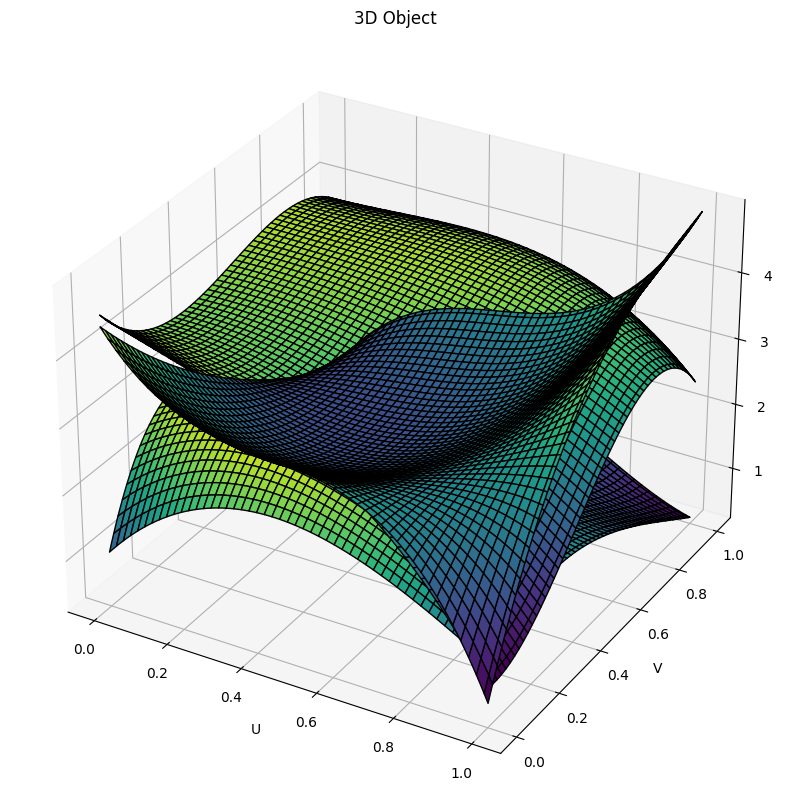

In [15]:
def bezier_surface(control_points, u, v):
    m, n = control_points.shape[0] - 1, control_points.shape[1] - 1
    result = np.zeros_like(control_points[0, 0])

    for i in range(m + 1):
        for j in range(n + 1):
            binomial_coeff_u = np.math.comb(m, i)
            binomial_coeff_v = np.math.comb(n, j)
            coeff = binomial_coeff_u * binomial_coeff_v * (1 - u)**(m - i) * u**i * (1 - v)**(n - j) * v**j
            result += coeff * control_points[i, j]

    return result

def generate_random_object(num_control_points_u, num_control_points_v, randomness):
    control_points = np.zeros((num_control_points_u, num_control_points_v, 3))
    for i in range(num_control_points_u):
        for j in range(num_control_points_v):
            point = np.random.rand(3) * randomness
            control_points[i, j] = point
    return control_points

def plot_object(object_points):
    num_points_u, num_points_v, _ = object_points.shape
    u_values = np.linspace(0, 1, 100)
    v_values = np.linspace(0, 1, 100)
    points = np.zeros((len(u_values), len(v_values), 3))
    for i, u in enumerate(u_values):
        for j, v in enumerate(v_values):
            point = bezier_surface(object_points, u, v)
            points[i, j] = point

    u_mesh, v_mesh = np.meshgrid(u_values, v_values)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 0], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 1], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 2], cmap='viridis', edgecolor='k')
    ax.set_xlabel('U')
    ax.set_ylabel('V')
    ax.set_zlabel('Z')
    ax.set_title('3D Object')
    plt.show()

# Example usage
num_control_points_u = 4
num_control_points_v = 4
randomness = 5

object_points = generate_random_object(num_control_points_u, num_control_points_v, randomness)

plot_object(object_points)


/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/2461387375.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_u = np.math.comb(m, i)
/var/folders/dn/7d2nfy9j119fxnjdzpdbvd6w0000gn/T/ipykernel_20151/2461387375.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff_v = np.math.comb(n, j)


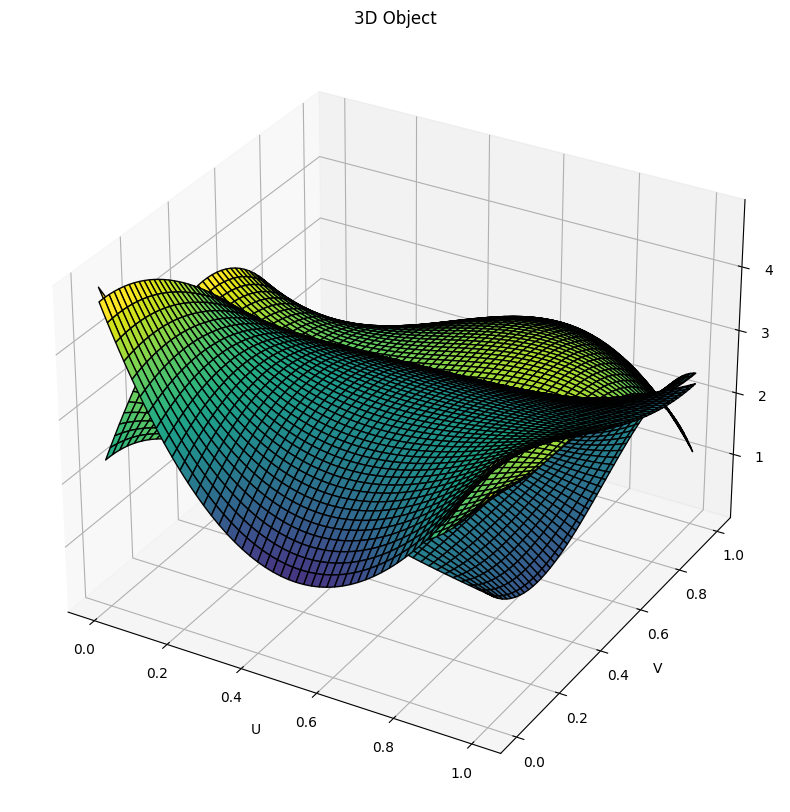

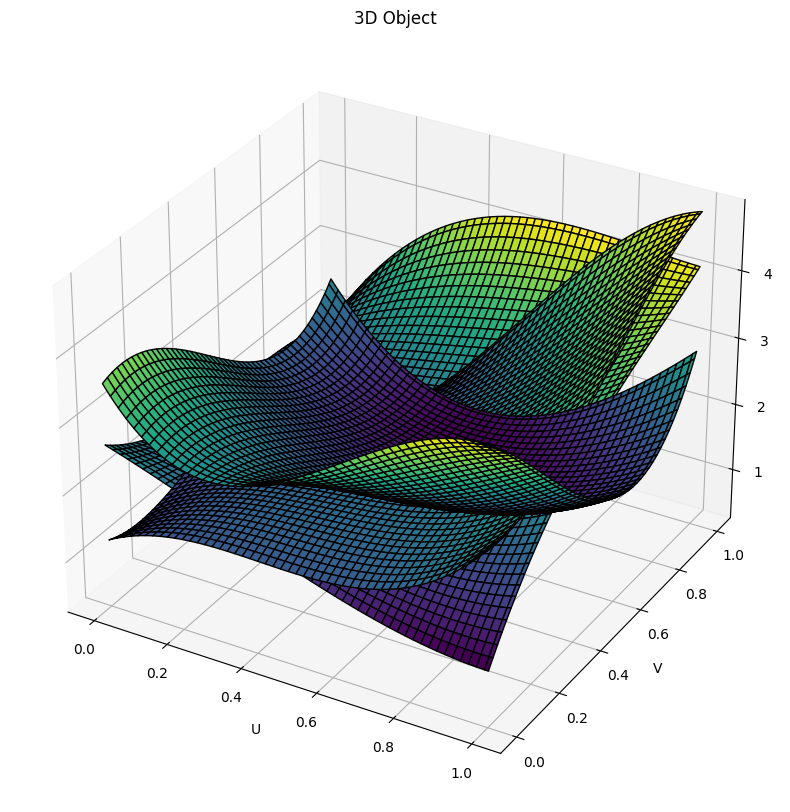

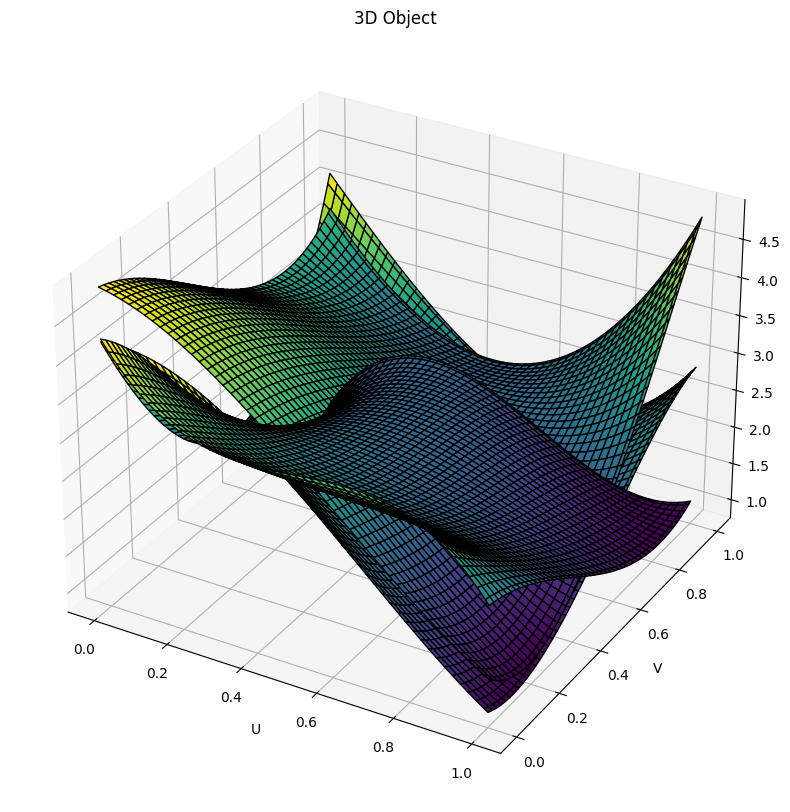

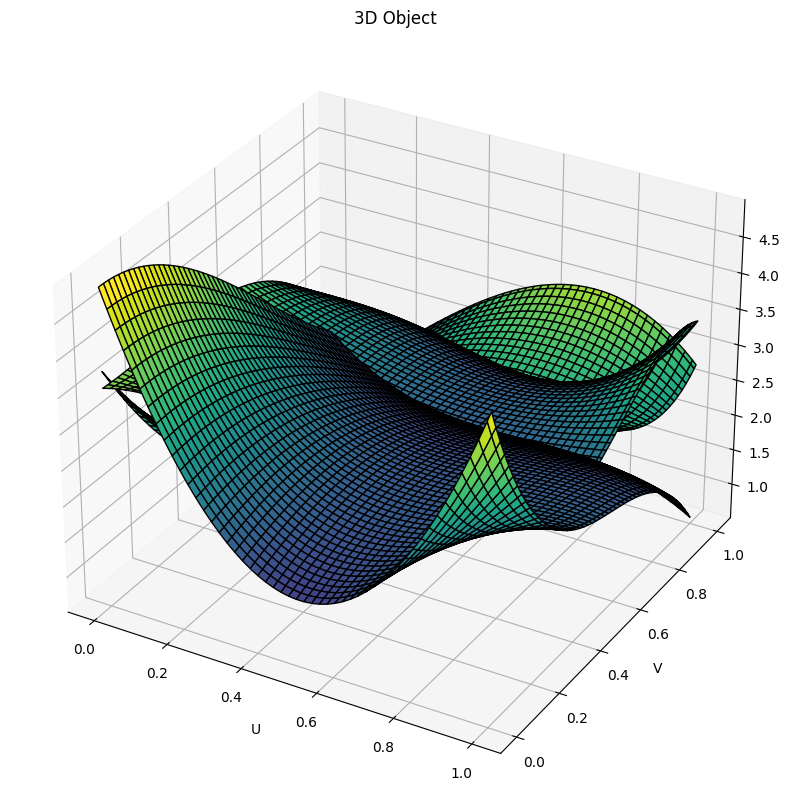

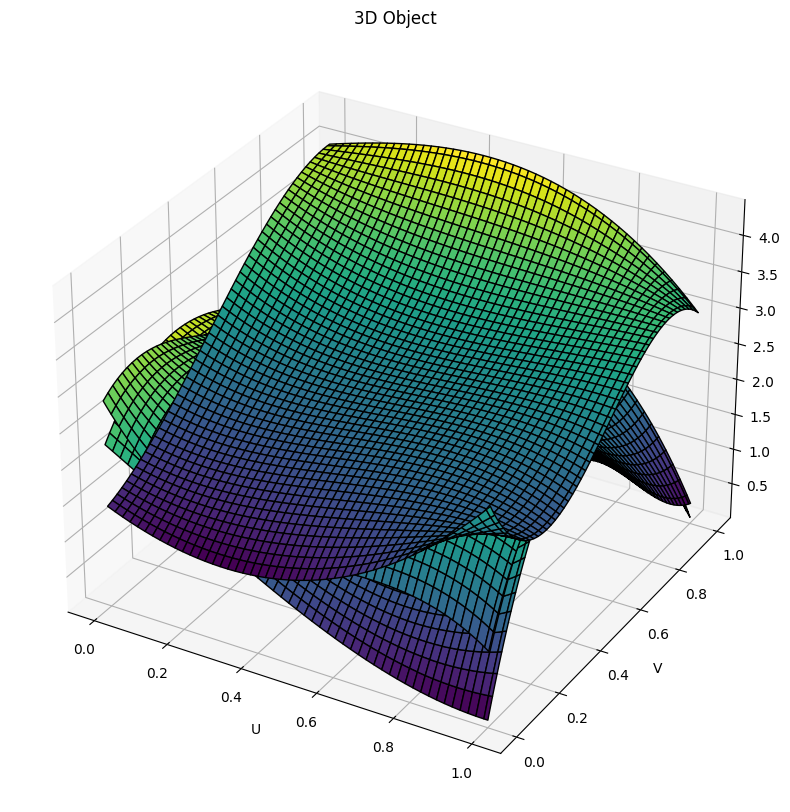

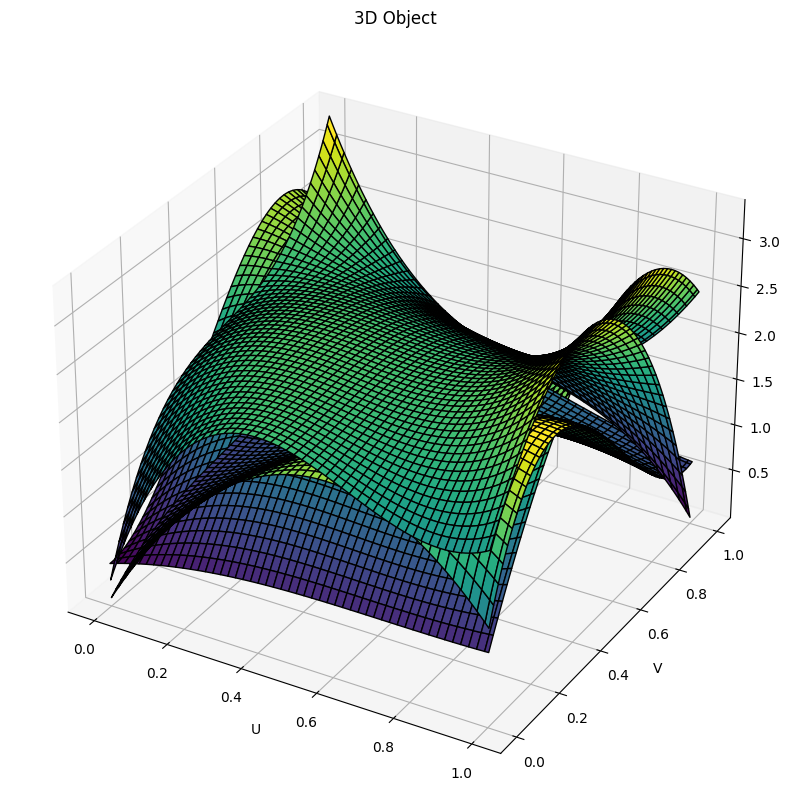

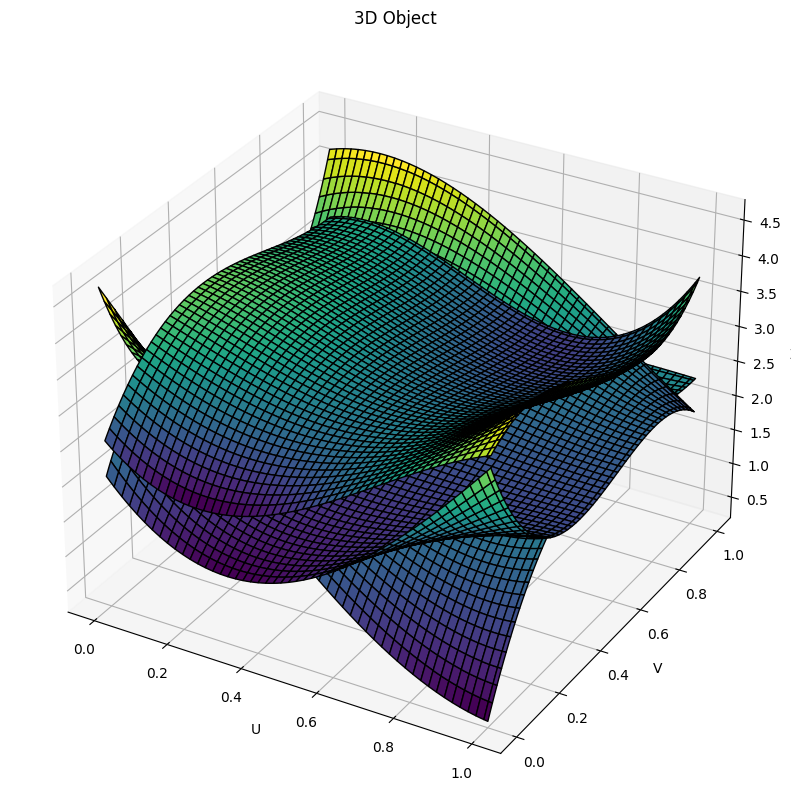

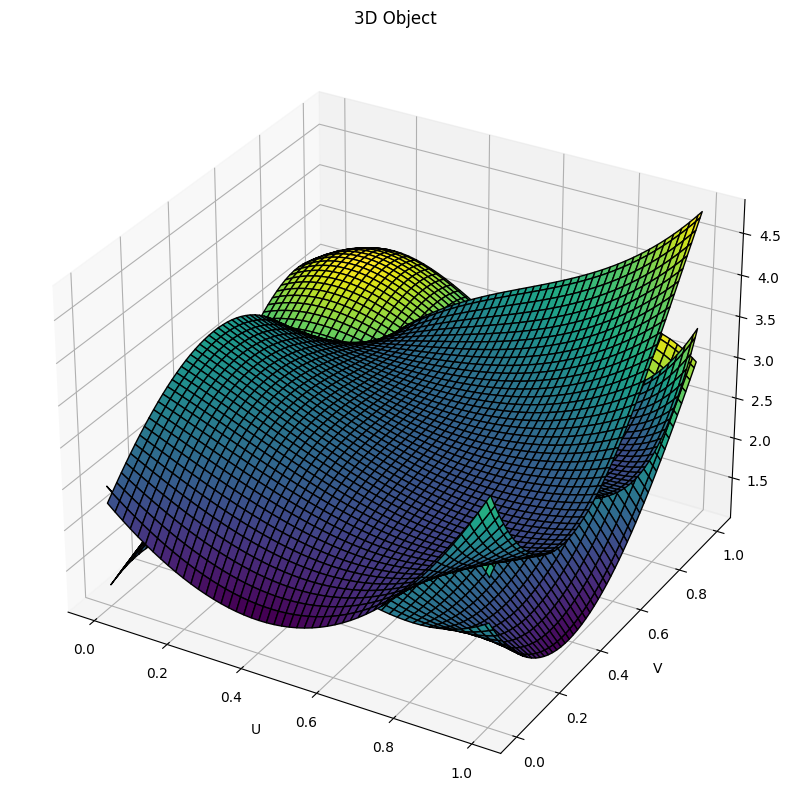

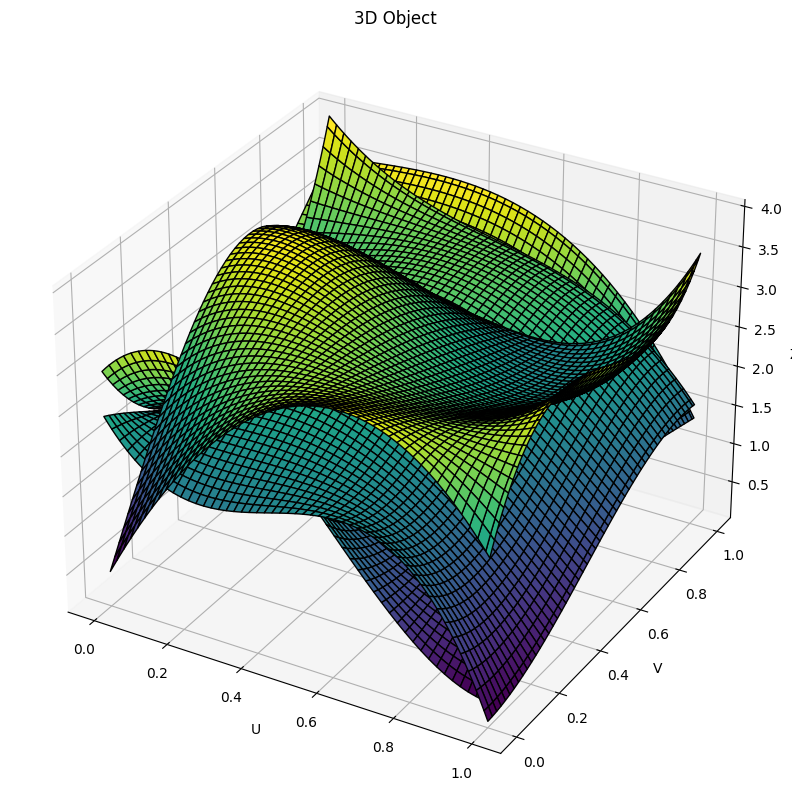

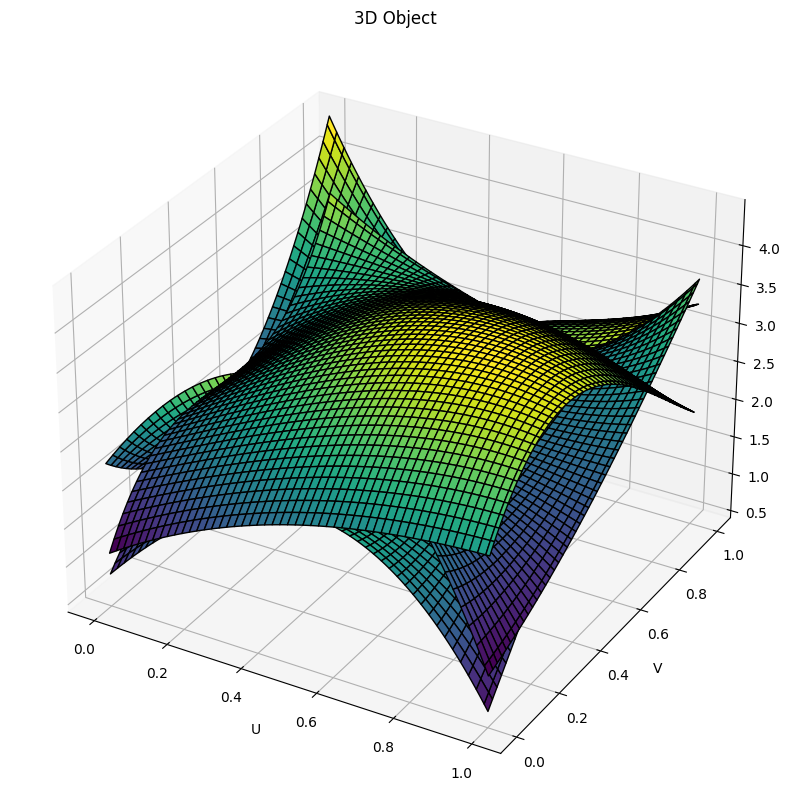

In [16]:
def bezier_surface(control_points, u, v):
    m, n = control_points.shape[0] - 1, control_points.shape[1] - 1
    result = np.zeros_like(control_points[0, 0])

    for i in range(m + 1):
        for j in range(n + 1):
            binomial_coeff_u = np.math.comb(m, i)
            binomial_coeff_v = np.math.comb(n, j)
            coeff = binomial_coeff_u * binomial_coeff_v * (1 - u)**(m - i) * u**i * (1 - v)**(n - j) * v**j
            result += coeff * control_points[i, j]

    return result

def generate_random_object(num_control_points_u, num_control_points_v, randomness):
    control_points = np.zeros((num_control_points_u, num_control_points_v, 3))
    for i in range(num_control_points_u):
        for j in range(num_control_points_v):
            point = np.random.rand(3) * randomness
            control_points[i, j] = point
    return control_points

def plot_object(object_points):
    num_points_u, num_points_v, _ = object_points.shape
    u_values = np.linspace(0, 1, 100)
    v_values = np.linspace(0, 1, 100)
    points = np.zeros((len(u_values), len(v_values), 3))
    for i, u in enumerate(u_values):
        for j, v in enumerate(v_values):
            point = bezier_surface(object_points, u, v)
            points[i, j] = point

    u_mesh, v_mesh = np.meshgrid(u_values, v_values)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 0], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 1], cmap='viridis', edgecolor='k')
    ax.plot_surface(u_mesh, v_mesh, points[:, :, 2], cmap='viridis', edgecolor='k')
    ax.set_xlabel('U')
    ax.set_ylabel('V')
    ax.set_zlabel('Z')
    ax.set_title('3D Object')
    plt.show()

# Random function to generate 10 shapes
def generate_10_shapes():
    num_control_points_u = 4
    num_control_points_v = 4
    randomness = 5

    for _ in range(10):
        object_points = generate_random_object(num_control_points_u, num_control_points_v, randomness)
        plot_object(object_points)

# Generate 10 random shapes
generate_10_shapes()
